In [1]:
cd("../")                             

In [2]:

using Pkg
if isfile("Project.toml") && isfile("Manifest.toml")
    Pkg.activate(".")
end

# Pkg.instantiate()

#FIXME make the including and using clean. you are including usings in irrelevant files. also including with revise you can check it including only one file and see it is running independently and then continue
using IJulia
using BSON


using Revise
includet("../src/quantile_transformation.jl")
includet("../src/evaluation/evaluation.jl")
includet("../src/GLM.jl")
includet("../src/structs.jl")
includet("../src/load_data.jl")
includet("../visualization/visualization.jl")


  Activating environment at `~/Documents/Project_PTVAE/progs/github_repo/LatentSubgroups/Project.toml`


# Simulation Design

### Robustness of our approach

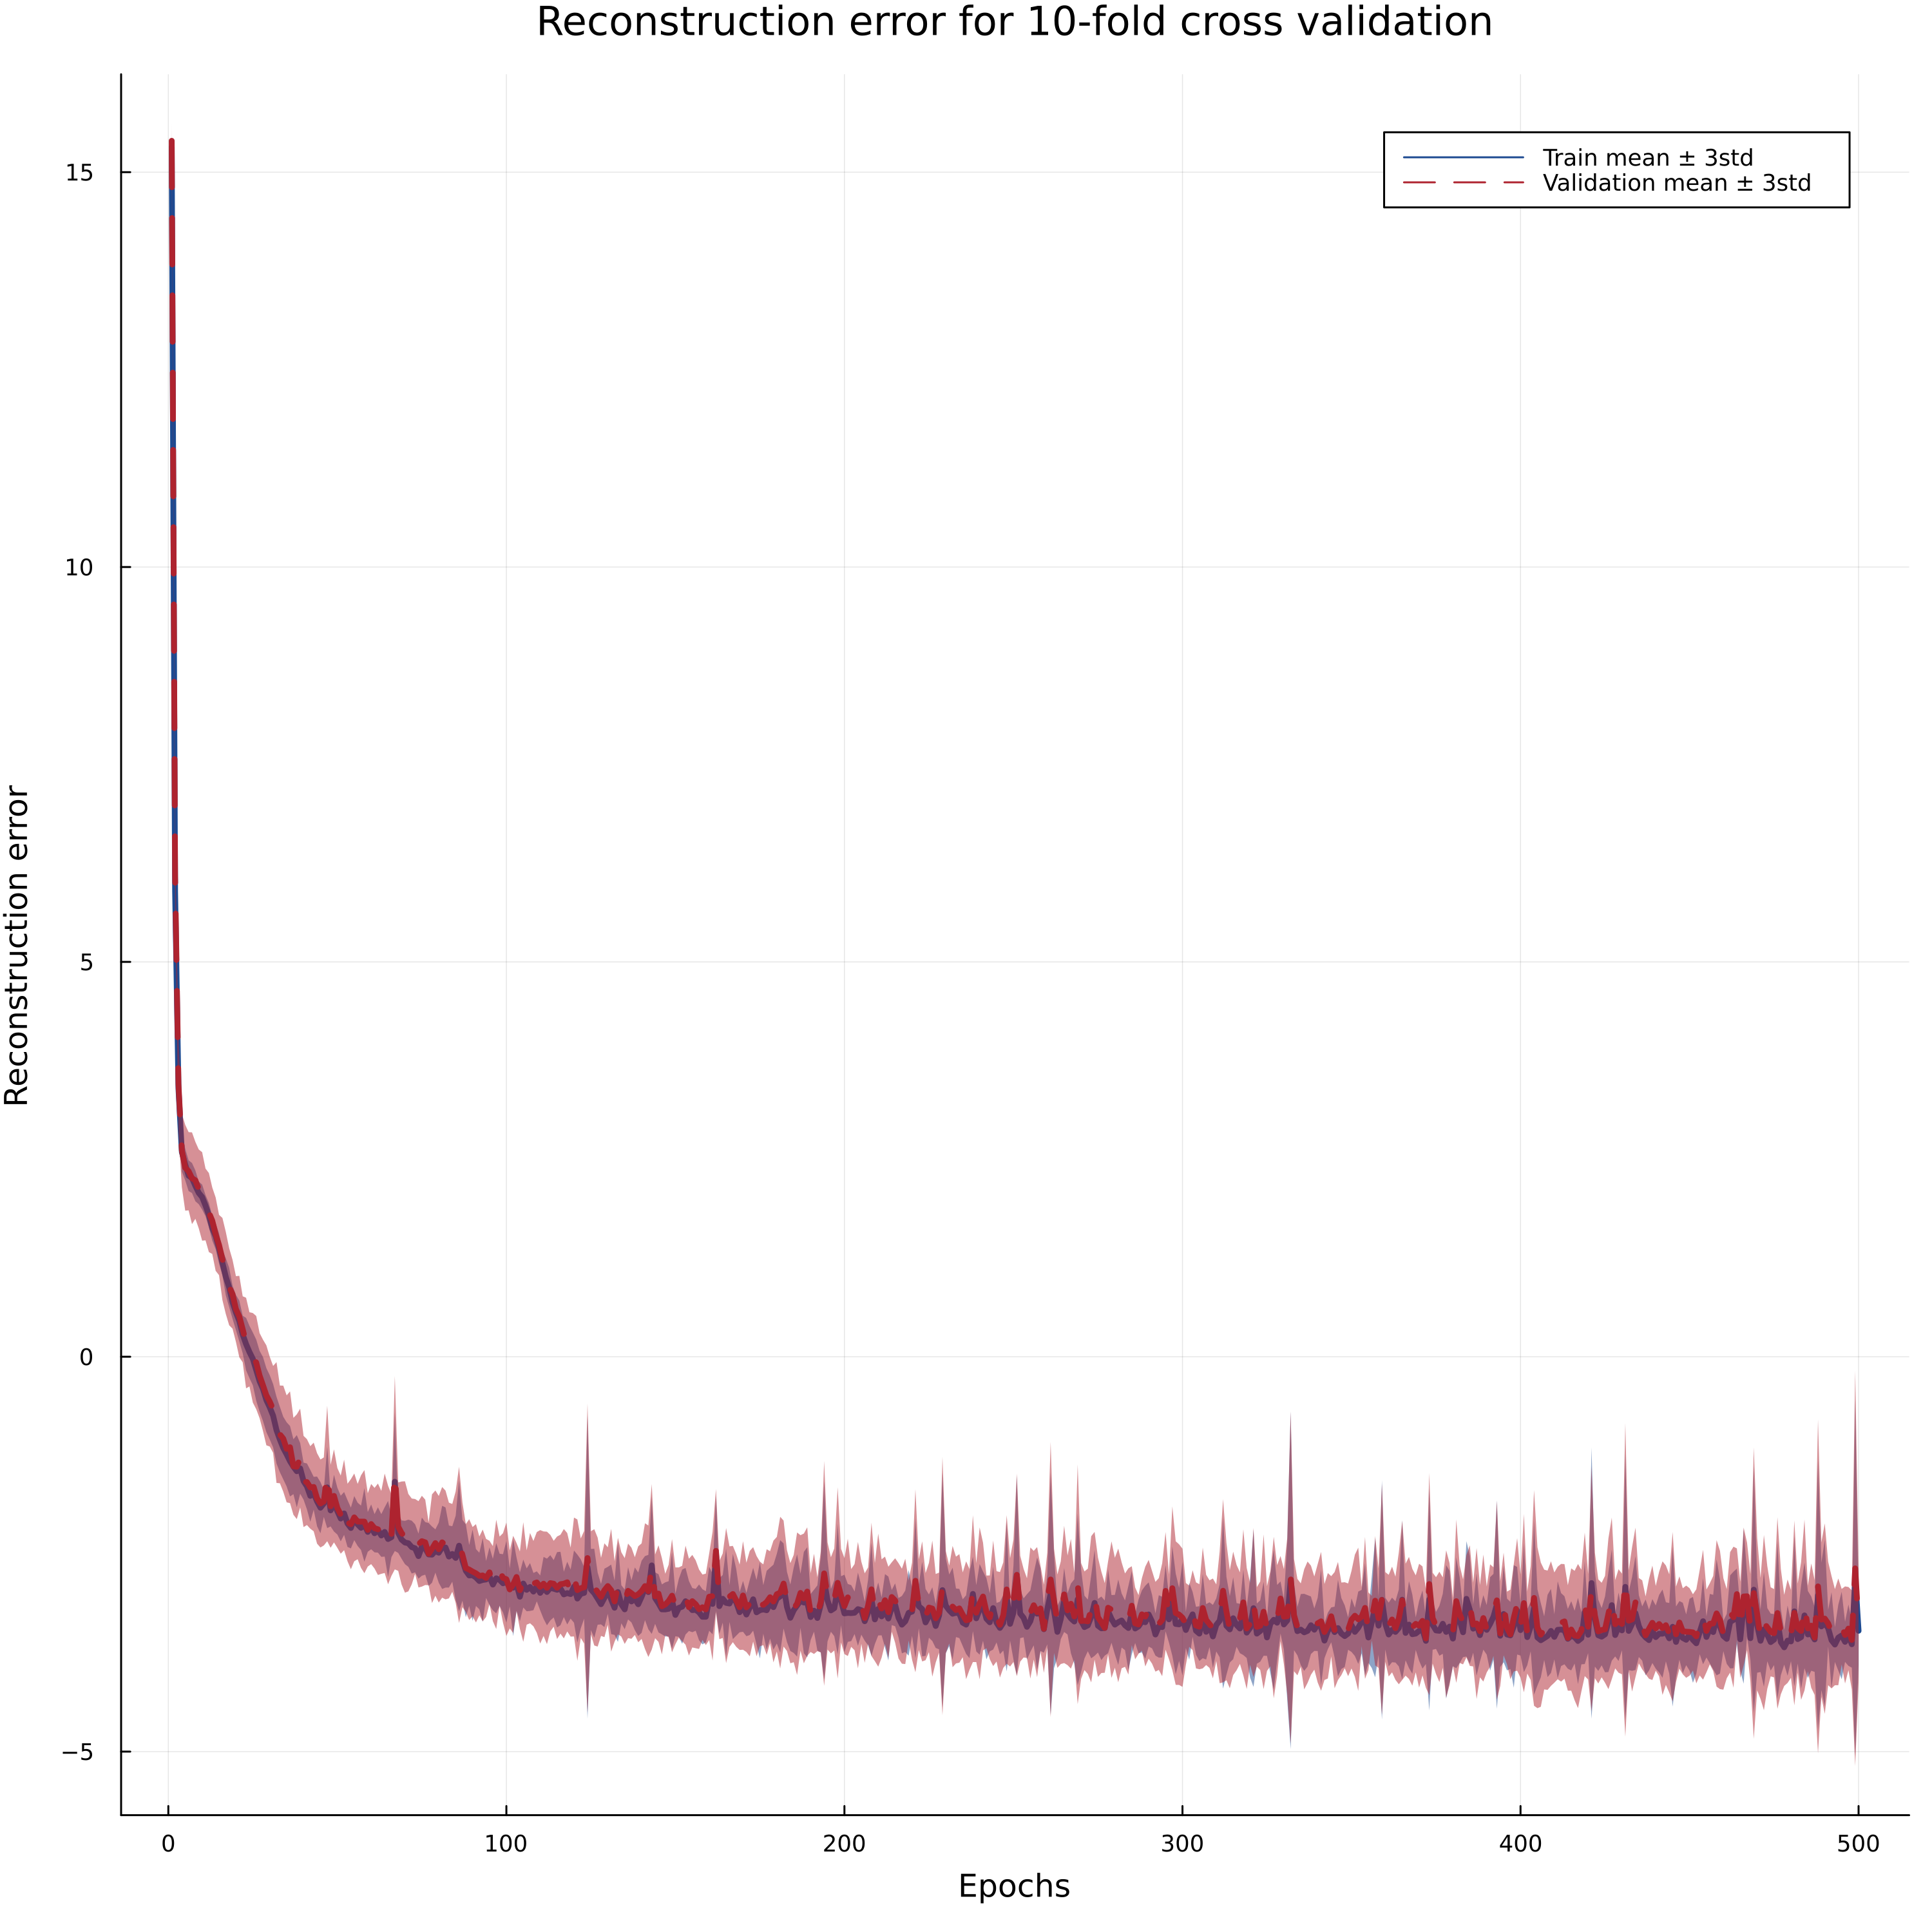

In [22]:
sim_cross_val_path = "runs/run_460"

reconstruction_train_val_sets = BSON.load(string(sim_cross_val_path, "/10fold_cross_validation/reconstruction_values/reconstruction_values"))[:reconstruction_train_val_sets]


cross_val_reconstruction_plot(reconstruction_train_val_sets)

plt_sim_rec = cross_val_reconstruction_plot_mean_shade(reconstruction_train_val_sets)

In [23]:
Plots.savefig("./figures/reconstruction_loss_sim.png")
Plots.savefig("./figures/reconstruction_loss_sim.pdf")

"/Users/farhadyar/Documents/Project_PTVAE/progs/github_repo/LatentSubgroups/figures/reconstruction_loss_sim.pdf"

In [24]:
# Set the input and output filenames
input_pdf = "./figures/reconstruction_loss_sim.pdf"
output_eps = "./figures/reconstruction_loss_sim.eps"

# Construct the Ghostscript command
command = `gs -dNOPAUSE -dBATCH -dEPSCrop -r300 -sDEVICE=eps2write -sOutputFile=$output_eps $input_pdf`

# Run the command
run(command)

GPL Ghostscript 10.01.2 (2023-06-21)
Copyright (C) 2023 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Processing pages 1 through 1.
Page 1


Process(`gs -dNOPAUSE -dBATCH -dEPSCrop -r300 -sDEVICE=eps2write -sOutputFile=./figures/reconstruction_loss_sim.eps ./figures/reconstruction_loss_sim.pdf`, ProcessExited(0))

## CART-based utility metric

### pre-transformation VAE

In [4]:
utility_measurement_array = []
for fold = 1:10
    original_path_sim  = "./runs/run_454/10fold_cross_validation/fold_$(fold)/val.csv"
    path_sim_ptvae = Matrix(CSV.read("./runs/run_454/10fold_cross_validation/fold_$(fold)/vae/prior_sampling_val/synthetic_data_prior.csv" , DataFrame, header = true))[:,2:end]
    utility_measurement = utility(original_path_sim, nothing, path_sim_ptvae)
    push!(utility_measurement_array, utility_measurement)
end

pMSE_mean, pMSE_std, pMSE_ratio_mean, pMSE_ratio_std, Standardize_pMSE_mean, Standardize_pMSE_std = calculate_utility_measurement_mean_std(utility_measurement_array)



pMSE: 0.068 ± 0.008
pMSE_ratio: 1.292 ± 0.154
Standardize_pMSE: 3.06 ± 1.689


(0.06777253504397326, 0.00817316592161714, 1.2917026024999434, 0.15449631316794898, 3.06023961698858, 1.6891455838087979)

### (100 quantile) pre-transformation VAE

In [5]:
utility_measurement_array = []
for fold = 1:10
    original_path_sim  = "./runs/run_462/10fold_cross_validation/fold_$(fold)/val.csv"
    q100_ptvae_syn_sim = Matrix(CSV.read("./runs/run_462/10fold_cross_validation/fold_$(fold)/vae/prior_sampling_val/synthetic_data_prior.csv" , DataFrame, header = true))[:,2:end]
    utility_measurement = utility(original_path_sim, nothing, q100_ptvae_syn_sim)
    push!(utility_measurement_array, utility_measurement)
end

pMSE_mean, pMSE_std, pMSE_ratio_mean, pMSE_ratio_std, Standardize_pMSE_mean, Standardize_pMSE_std = calculate_utility_measurement_mean_std(utility_measurement_array)


pMSE: 0.057 ± 0.006
pMSE_ratio: 1.153 ± 0.124
Standardize_pMSE: 1.558 ± 1.189


(0.05724992917455894, 0.006142142321871202, 1.1525026147662687, 0.12406660372608555, 1.558271811871124, 1.189255222852161)

### standard VAE

In [6]:
utility_measurement_array = []
for fold = 1:10
    original_path_sim  = "./runs/run_455/10fold_cross_validation/fold_$(fold)/val.csv"
    q100_ptvae_syn_sim = Matrix(CSV.read("./runs/run_455/10fold_cross_validation/fold_$(fold)/vae/prior_sampling_val/synthetic_data_prior.csv" , DataFrame, header = true))[:,2:end]
    utility_measurement = utility(original_path_sim, nothing, q100_ptvae_syn_sim)
    push!(utility_measurement_array, utility_measurement)
end

pMSE_mean, pMSE_std, pMSE_ratio_mean, pMSE_ratio_std, Standardize_pMSE_mean, Standardize_pMSE_std = calculate_utility_measurement_mean_std(utility_measurement_array)


pMSE: 0.093 ± 0.008
pMSE_ratio: 1.776 ± 0.145
Standardize_pMSE: 8.523 ± 1.77


(0.09295826490191707, 0.007641063468735475, 1.776327917820581, 0.14486151788684798, 8.522794609770331, 1.770450164990666)

### QVAE

In [7]:
utility_measurement_array = []
for fold = 1:10
    original_path_sim  = "./runs/run_456/10fold_cross_validation/fold_$(fold)/val.csv"
    q100_ptvae_syn_sim = Matrix(CSV.read("./runs/run_456/10fold_cross_validation/fold_$(fold)/vae/prior_sampling_val/synthetic_data_prior.csv" , DataFrame, header = true))[:,2:end]
    utility_measurement = utility(original_path_sim, nothing, q100_ptvae_syn_sim)
    push!(utility_measurement_array, utility_measurement)
end

pMSE_mean, pMSE_std, pMSE_ratio_mean, pMSE_ratio_std, Standardize_pMSE_mean, Standardize_pMSE_std = calculate_utility_measurement_mean_std(utility_measurement_array)


pMSE: 0.094 ± 0.004
pMSE_ratio: 1.776 ± 0.078
Standardize_pMSE: 8.127 ± 0.966


(0.09369277561929408, 0.003890560784976406, 1.776142399056401, 0.07792994075181592, 8.127382886972716, 0.966302232584579)

### Norta-J

In [8]:
utility_measurement_array = []
for fold = 1:10
    path_sim  = "./Norta-J/run_sim_cross_validation/fold_$(fold)/val.csv"
    nortaj_syn_sim = Matrix(CSV.read("./Norta-J/run_sim_cross_validation/fold_$(fold)/synthetic.csv" , DataFrame, header = true))[:,2:end]
    utility_measurement = utility(path_sim, nothing, nortaj_syn_sim)
    push!(utility_measurement_array, utility_measurement)
end

pMSE_mean, pMSE_std, pMSE_ratio_mean, pMSE_ratio_std, Standardize_pMSE_mean, Standardize_pMSE_std = calculate_utility_measurement_mean_std(utility_measurement_array)


pMSE: 0.097 ± 0.009
pMSE_ratio: 2.272 ± 0.229
Standardize_pMSE: 7.234 ± 1.237


(0.0972673502019265, 0.009447237796713992, 2.2723077417982847, 0.2285788804810098, 7.234263226072557, 1.2369590779794333)

### GAN

In [9]:
utility_measurement_array = []
for fold = 1:10
    path_sim  = "./GAN/runs/run_3/10fold_cross_validation/fold_$(fold)/val.csv"
    gan_syn_sim = Matrix(CSV.read("./GAN/runs/run_3/10fold_cross_validation/fold_$(fold)/gan/synthetic_data_val.csv" , DataFrame, header = true))[:,2:end]
    utility_measurement = utility(path_sim, nothing, gan_syn_sim)
    push!(utility_measurement_array, utility_measurement)
end

pMSE_mean, pMSE_std, pMSE_ratio_mean, pMSE_ratio_std, Standardize_pMSE_mean, Standardize_pMSE_std = calculate_utility_measurement_mean_std(utility_measurement_array)


pMSE: 0.156 ± 0.007
pMSE_ratio: 3.008 ± 0.156
Standardize_pMSE: 20.896 ± 2.718


(0.15571813936929868, 0.007086647184464016, 3.0082917979436554, 0.15566394891878904, 20.896154216651738, 2.7176288012666805)

# IST Data

### Robustness of our approach

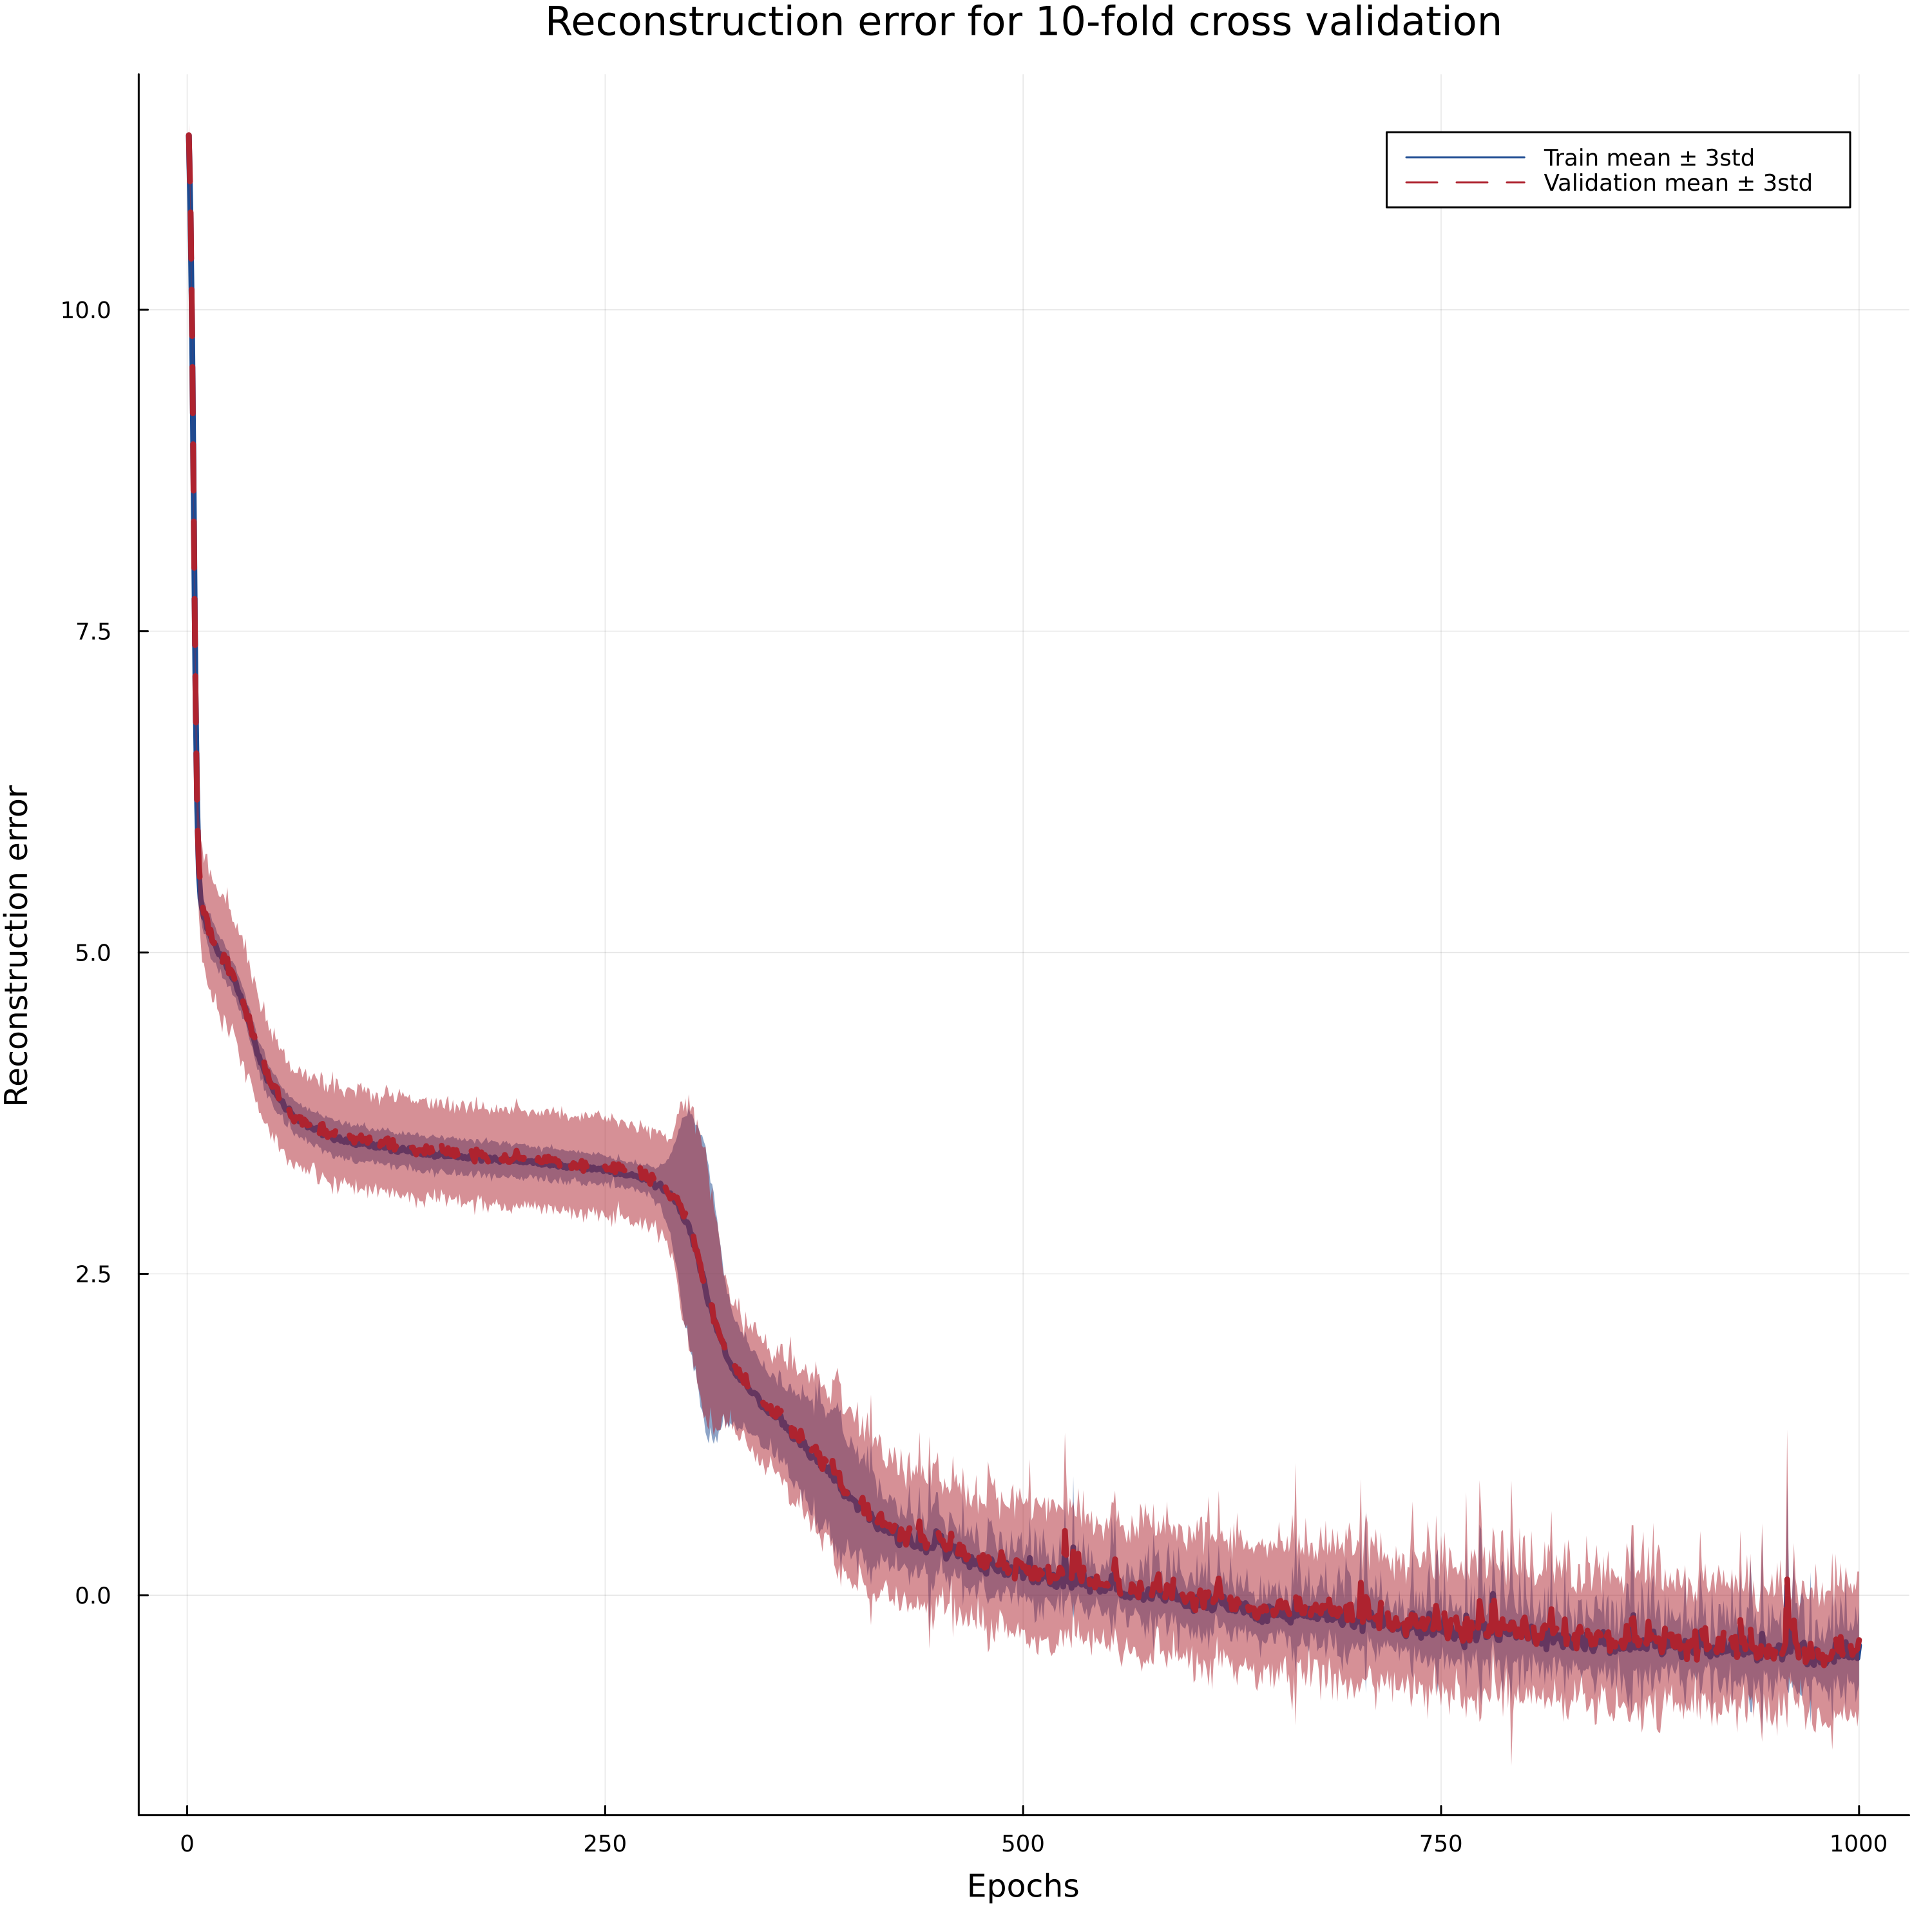

In [19]:
sim_cross_val_path = "runs/run_461"

reconstruction_train_val_sets = BSON.load(string(sim_cross_val_path, "/10fold_cross_validation/reconstruction_values/reconstruction_values"))[:reconstruction_train_val_sets]


cross_val_reconstruction_plot(reconstruction_train_val_sets)

plt_IST_rec = cross_val_reconstruction_plot_mean_shade(reconstruction_train_val_sets)

In [20]:

Plots.savefig("./figures/reconstruction_loss_ist.png")
Plots.savefig("./figures/reconstruction_loss_ist.pdf")

"/Users/farhadyar/Documents/Project_PTVAE/progs/github_repo/LatentSubgroups/figures/reconstruction_loss_ist.pdf"

In [21]:
# Set the input and output filenames
input_pdf = "./figures/reconstruction_loss_ist.pdf"
output_eps = "./figures/reconstruction_loss_ist.eps"

# Construct the Ghostscript command
command = `gs -dNOPAUSE -dBATCH -dEPSCrop -r300 -sDEVICE=eps2write -sOutputFile=$output_eps $input_pdf`

# Run the command
run(command)

GPL Ghostscript 10.01.2 (2023-06-21)
Copyright (C) 2023 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Processing pages 1 through 1.
Page 1


Process(`gs -dNOPAUSE -dBATCH -dEPSCrop -r300 -sDEVICE=eps2write -sOutputFile=./figures/reconstruction_loss_ist.eps ./figures/reconstruction_loss_ist.pdf`, ProcessExited(0))

## CART-based utility metric

### Pre-transformation

In [11]:
utility_measurement_array = []
for fold = 1:10
    original_path_ist  = "./runs/run_457/10fold_cross_validation/fold_$(fold)/val.csv"
    path_ist_ptvae = Matrix(CSV.read("./runs/run_457/10fold_cross_validation/fold_$(fold)/vae/prior_sampling_val/synthetic_data_prior.csv" , DataFrame, header = true))[:,2:end]
    utility_measurement = utility(original_path_ist, nothing, path_ist_ptvae)
    push!(utility_measurement_array, utility_measurement)
end

pMSE_mean, pMSE_std, pMSE_ratio_mean, pMSE_ratio_std, Standardize_pMSE_mean, Standardize_pMSE_std = calculate_utility_measurement_mean_std(utility_measurement_array)



pMSE: 0.091 ± 0.034
pMSE_ratio: 2.449 ± 0.935
Standardize_pMSE: 11.508 ± 7.281


(0.09109646192572157, 0.033895113712412474, 2.4490327049214384, 0.9354294708851635, 11.508000645127101, 7.280943086100873)

### (100 quantile) pre-transformation VAE

In [12]:
utility_measurement_array = []
for fold = 1:10
    original_path_ist  = "./runs/run_462/10fold_cross_validation/fold_$(fold)/val.csv"
    q100_ptvae_syn_ist = Matrix(CSV.read("./runs/run_462/10fold_cross_validation/fold_$(fold)/vae/prior_sampling_val/synthetic_data_prior.csv" , DataFrame, header = true))[:,2:end]
    utility_measurement = utility(original_path_ist, nothing, q100_ptvae_syn_ist)
    push!(utility_measurement_array, utility_measurement)
end

pMSE_mean, pMSE_std, pMSE_ratio_mean, pMSE_ratio_std, Standardize_pMSE_mean, Standardize_pMSE_std = calculate_utility_measurement_mean_std(utility_measurement_array)



pMSE: 0.057 ± 0.006
pMSE_ratio: 1.153 ± 0.124
Standardize_pMSE: 1.558 ± 1.189


(0.05724992917455894, 0.006142142321871202, 1.1525026147662687, 0.12406660372608555, 1.558271811871124, 1.189255222852161)

### standard VAE

In [13]:
utility_measurement_array = []
for fold = 1:10
    original_path_ist  = "./runs/run_458/10fold_cross_validation/fold_$(fold)/val.csv"
    vae_syn_ist = Matrix(CSV.read("./runs/run_458/10fold_cross_validation/fold_$(fold)/vae/prior_sampling_val/synthetic_data_prior.csv" , DataFrame, header = true))[:,2:end]
    utility_measurement = utility(original_path_ist, nothing, vae_syn_ist)
    push!(utility_measurement_array, utility_measurement)
end

pMSE_mean, pMSE_std, pMSE_ratio_mean, pMSE_ratio_std, Standardize_pMSE_mean, Standardize_pMSE_std = calculate_utility_measurement_mean_std(utility_measurement_array)



pMSE: 0.106 ± 0.034
pMSE_ratio: 2.85 ± 0.924
Standardize_pMSE: 15.338 ± 7.885


(0.10640085852719901, 0.03438657696325337, 2.849605785914435, 0.9237325494551283, 15.337753224361133, 7.885165538070855)

### QVAE

In [14]:
utility_measurement_array = []
for fold = 1:10
    original_path_ist  = "./runs/run_459/10fold_cross_validation/fold_$(fold)/val.csv"
    qvae_syn_ist = Matrix(CSV.read("./runs/run_459/10fold_cross_validation/fold_$(fold)/vae/prior_sampling_val/synthetic_data_prior.csv" , DataFrame, header = true))[:,2:end]
    utility_measurement = utility(original_path_ist, nothing, qvae_syn_ist)
    push!(utility_measurement_array, utility_measurement)
end

pMSE_mean, pMSE_std, pMSE_ratio_mean, pMSE_ratio_std, Standardize_pMSE_mean, Standardize_pMSE_std = calculate_utility_measurement_mean_std(utility_measurement_array)


pMSE: 0.094 ± 0.03
pMSE_ratio: 2.525 ± 0.82
Standardize_pMSE: 12.382 ± 6.207


(0.09370812798581804, 0.030108015113879498, 2.524914937699393, 0.8197689809303501, 12.38234968826389, 6.206624530518658)

### GAN

In [15]:
utility_measurement_array = []
for fold = 1:10
    path_ist  = "./GAN/runs/run_4/10fold_cross_validation/fold_$(fold)/val.csv"
    gan_syn_ist = Matrix(CSV.read("./GAN/runs/run_4/10fold_cross_validation/fold_$(fold)/gan/synthetic_data_val.csv" , DataFrame, header = true))[:,2:end]
    utility_measurement = utility(path_ist, nothing, gan_syn_ist)
    push!(utility_measurement_array, utility_measurement)
end

pMSE_mean, pMSE_std, pMSE_ratio_mean, pMSE_ratio_std, Standardize_pMSE_mean, Standardize_pMSE_std = calculate_utility_measurement_mean_std(utility_measurement_array)


pMSE: 0.114 ± 0.009
pMSE_ratio: 3.084 ± 0.252
Standardize_pMSE: 17.146 ± 2.534


(0.1143439587148501, 0.009290602498164042, 3.083821343628927, 0.2516234331047526, 17.145611123706914, 2.5337918767830376)

### Norta-j

In [16]:
utility_measurement_array = []
for fold = 1:10
    path_ist  = "./Norta-J/run_ist_cross_validation/fold_$(fold)/val.csv"
    nortaj_syn_ist = Matrix(CSV.read("./Norta-J/run_ist_cross_validation/fold_$(fold)/synthetic.csv" , DataFrame, header = true))[:,2:end]
    utility_measurement = utility(path_ist, nothing, nortaj_syn_ist)
    push!(utility_measurement_array, utility_measurement)
end

pMSE_mean, pMSE_std, pMSE_ratio_mean, pMSE_ratio_std, Standardize_pMSE_mean, Standardize_pMSE_std = calculate_utility_measurement_mean_std(utility_measurement_array)


pMSE: 0.085 ± 0.036
pMSE_ratio: 2.707 ± 1.152
Standardize_pMSE: 9.829 ± 6.508


(0.08525370861401516, 0.03616056976544654, 2.706686039899828, 1.1515557913011438, 9.828557630075219, 6.508339902944939)